# 0) At the beginning of your Jupyter notebook, include the following code chunk. This will load required packages:¶

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1)	The tips.csv dataset contains data on tips collected from a restaurant. 
## a.	Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.

In [3]:
# This will import the table
tips = Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


sex    | tip mean
Female | 2.83345
Male   | 3.08962


C:\Users\C20Yann.Wollman\anacondaAnaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


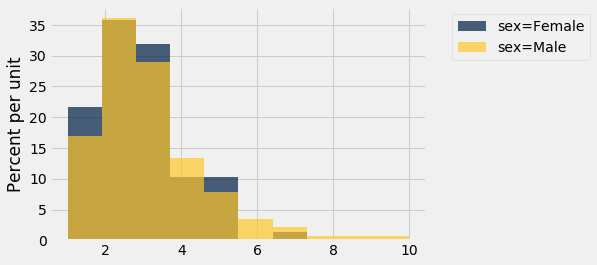

In [4]:
# Find the average tip by gender:
print(tips.select("tip", "sex").group("sex", np.mean))

# Build a histogram of tips for males and one for females; has them overlaid.
tips.select("tip", "sex").hist("tip", group="sex")

Result: Males, on average, tip more than females.

## b.	Repeat part a, but broken down by time.

C:\Users\C20Yann.Wollman\anacondaAnaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


time   | tip mean
Dinner | 3.10267
Lunch  | 2.72809


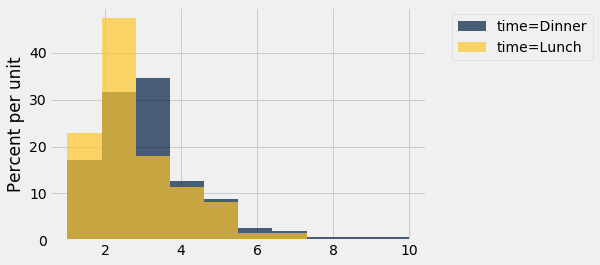

In [5]:
#Find the average tip by time:
print(tips.select("tip", "time").group("time", np.mean))

# Build a histogram of tips broken down by time; has them overlaid.
tips.select("tip", "time").hist("tip", group="time")

Result: People tip smaller amounts at lunch than they do for dinner. Overall though, tipping is greater, on average, at dinner.

# 2)	Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [6]:
conversion = {"Mon":1, "Tues":2,"Wed":3, "Thur":4, "Fri":5, "Sat":6, "Sun":7}

def weekday_to_num(day):
    return conversion[day]

weekday_to_num("Fri")

5

# 3)	Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num. 

In [7]:
day_tips = tips.select('day')
day_tips = day_tips.with_column("weekday_num", tips.apply(weekday_to_num, "day"))
day_tips

day,weekday_num
Sun,7
Sun,7
Sun,7
Sun,7
Sun,7
Sun,7
Sun,7
Sun,7
Sun,7
Sun,7


# 4)	Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of this function will be the predicted tip amount. 

In [8]:
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [11]:
def est_tip(total_bill, window):
    " Predict tip amount based on the value of the bill "
    return tips.where('total_bill', are.between(total_bill - window, total_bill + window)).column('tip').mean()
    
est_tip(20, 1)

3.143333333333333

# 5)	Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount. 

In [40]:
pred_tip = tips.apply(lambda x: est_tip(x,1),"total_bill");

In [41]:
new_tips = tips.with_column("Predicted Tip", pred_tip)
new_tips

total_bill,tip,sex,smoker,day,time,size,Predicted Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


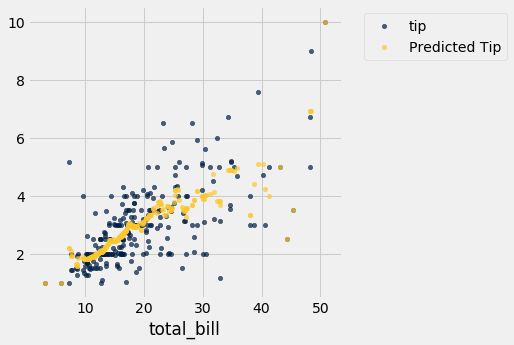

In [45]:
new_tips.scatter("total_bill", ["tip","Predicted Tip"])